In [185]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [186]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/farmer.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [187]:
df.to_csv('farmer.csv',index=False)

In [188]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [189]:
group = df.groupby('label')

In [190]:
group[["temperature"]].mean()

,temperature
label,
apple,22.630942
banana,27.376798
blackgram,29.973340
chickpea,18.872847
coconut,27.409892
coffee,25.540477
cotton,23.988958
grapes,23.849575
jute,24.958376


In [191]:
group[['N']].mean()

,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [192]:
df['label'].nunique()

22

In [193]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [194]:
nitrogen = group['N'].agg(min_nitro='min',max_nitro='max',avg_nitro='mean')

In [195]:
nitrogen 

,min_nitro,max_nitro,avg_nitro
label,,,
apple,0,40,20.80
banana,80,120,100.23
blackgram,20,60,40.02
chickpea,20,60,40.09
coconut,0,40,21.98
coffee,80,120,101.20
cotton,100,140,117.77
grapes,0,40,23.18
jute,60,100,78.40


In [196]:
nitrogen.reset_index(inplace=True)

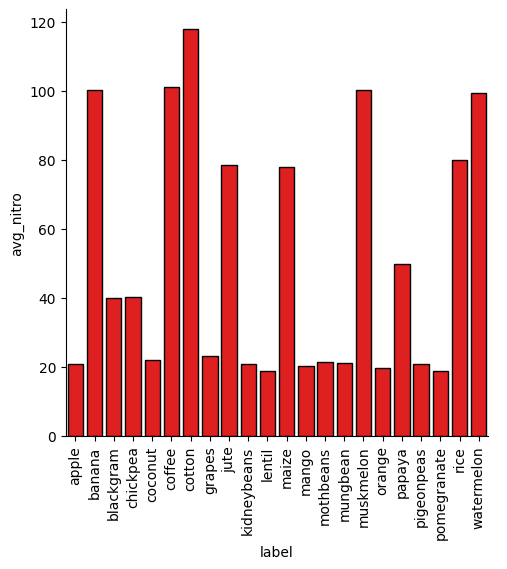

In [197]:
# sns.set(rc={'figure.figsize':(8,18)})
sns.catplot(x='label',y='avg_nitro',data=nitrogen,kind='bar',ec='k',color='r')
plt.xticks(rotation=90)
plt.show()

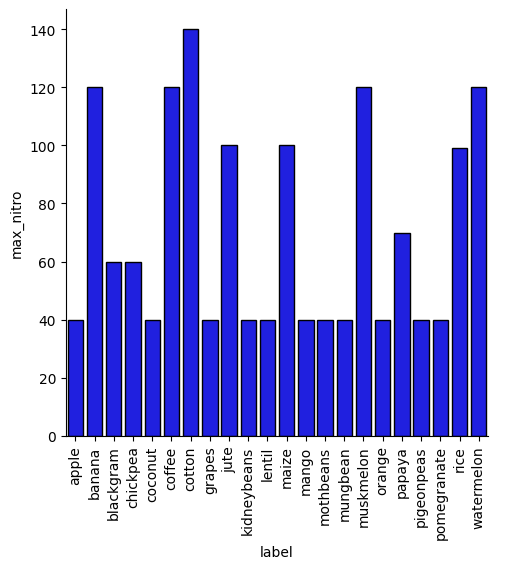

In [198]:
sns.catplot(x='label',y='max_nitro',data=nitrogen,kind='bar',ec='k',color='b')
plt.xticks(rotation=90)
plt.show()

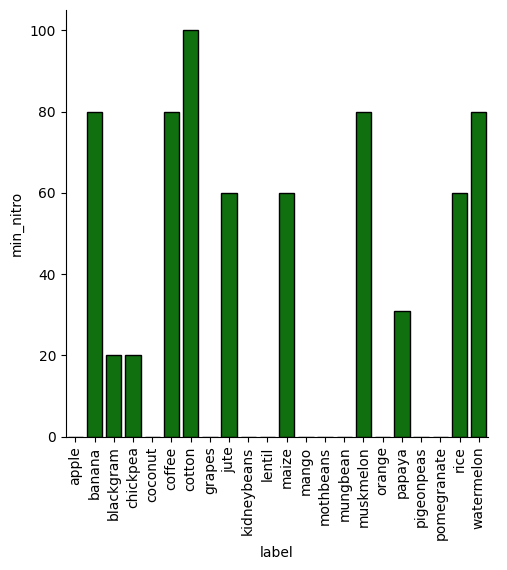

In [199]:
sns.catplot(x='label',y='min_nitro',data=nitrogen,kind='bar',ec='k',color='g')
plt.xticks(rotation=90)
plt.show()

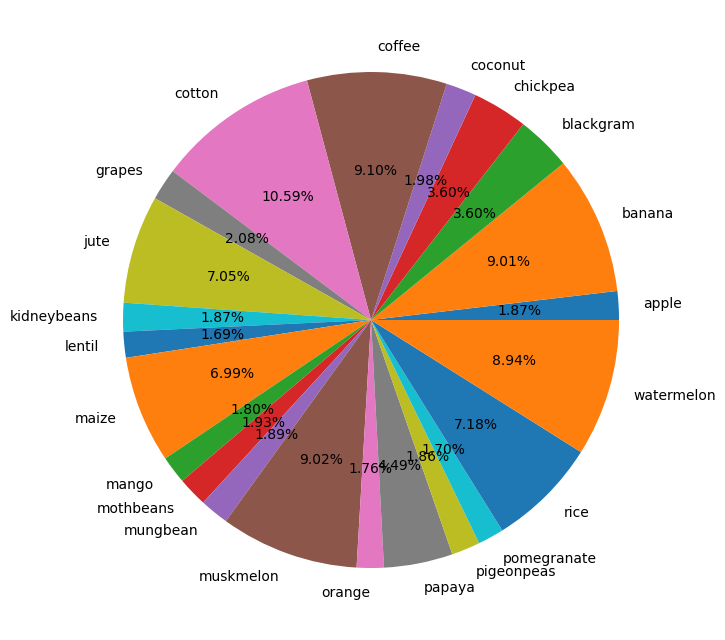

In [200]:
crops_label = list(nitrogen['label']) 
avg_nitrogen = list(nitrogen['avg_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

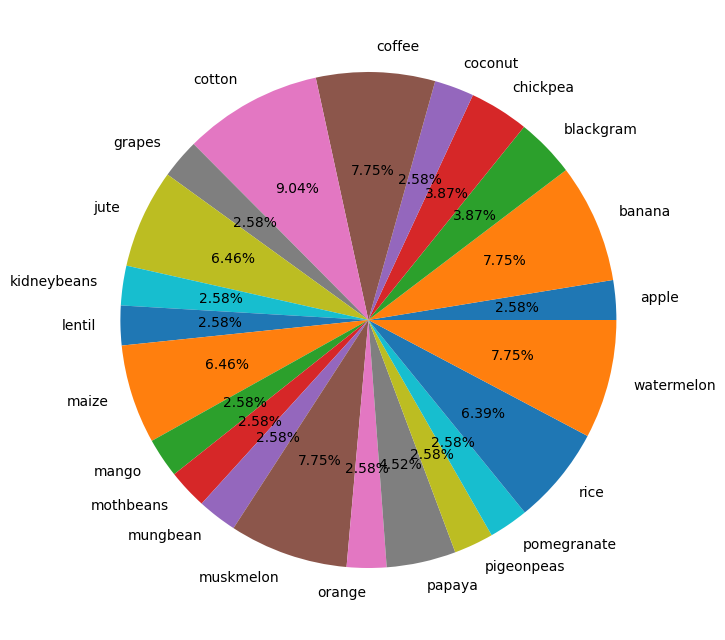

In [201]:
crops_label = list(nitrogen['label']) 
avg_nitrogen = list(nitrogen['max_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%')
plt.show()

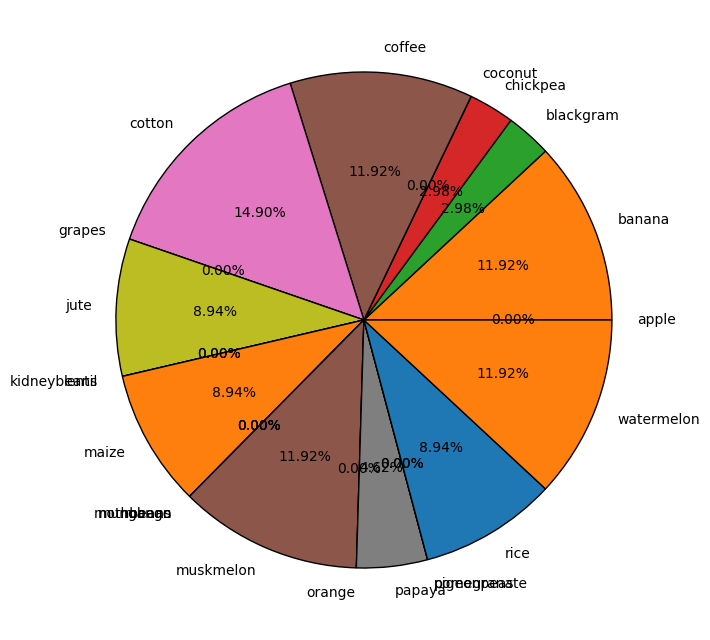

In [202]:
crops_label = list(nitrogen['label']) 
avg_nitrogen = list(nitrogen['min_nitro'])
plt.figure(figsize=(8,24))
plt.pie(avg_nitrogen,labels=crops_label,autopct='%2.2f%%',wedgeprops={'ec':'k'})
plt.show()

In [203]:
## unsupervised  X 
x = df.drop('label',axis=1)
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [204]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: xlabel='temperature', ylabel='Density'>

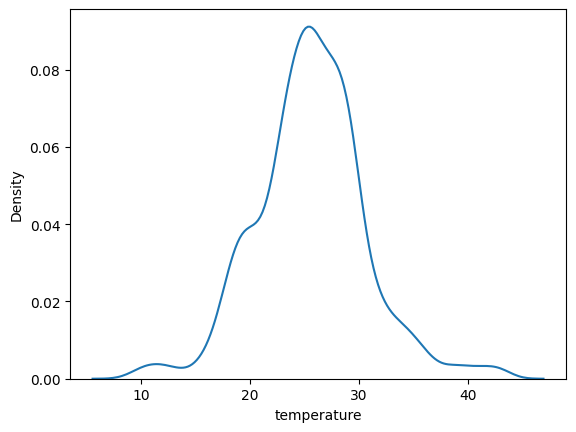

In [205]:
sns.kdeplot(x["temperature"])

In [206]:
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [208]:
df.duplicated().sum()

0

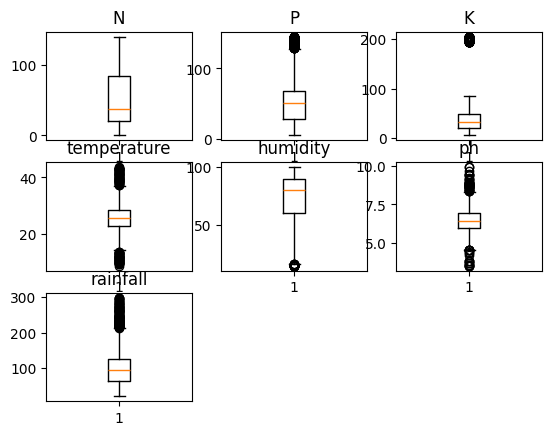

In [209]:
i = 1 
for col in x.columns: 
    plt.subplot(3,3,i)
    plt.title(col)
    plt.boxplot(df[col])
    i += 1 

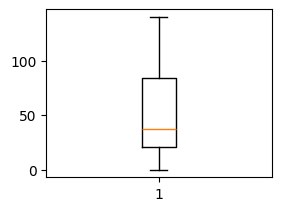

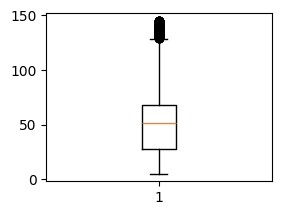

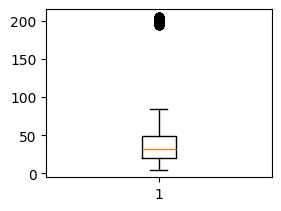

In [210]:
plt.subplot(2,2,1)
plt.boxplot(df['N'])
plt.show()

plt.subplot(2,2,2)
plt.boxplot(df['P'])
plt.show()

plt.subplot(2,2,3)
plt.boxplot(df['K'])
plt.show()

In [211]:
df['N'].mean()  # var()   # std()

50.551818181818184

In [212]:
 # KMeans  accuracy  normalize   
from sklearn.preprocessing import MinMaxScaler , RobustScaler ,Normalizer , StandardScaler 
std = StandardScaler()

x_transformed =  std.fit_transform(x)

In [213]:
x_transformed

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [214]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [215]:
x_transformed.shape 

(2200, 7)

In [216]:
x.shape 

(2200, 7)

In [217]:
from sklearn.cluster import KMeans  
kmeans = KMeans()  
kmeans.fit(x_transformed)

KMeans()

In [218]:
kmeans_obj =KMeans()

In [219]:
labels =kmeans_obj.fit_predict(x_transformed)

In [220]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7}

In [221]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [222]:
kmeans.labels_.shape  , df.shape

((2200,), (2200, 8))

In [223]:
df['cluster_no'] = kmeans.labels_

In [224]:
groupno_six = df[df['cluster_no'] == 5 ]

In [225]:
groupno_six['label'].unique()

array(['chickpea'], dtype=object)

In [226]:
# saving the objects 
import os,joblib 
os.makedirs('models',exist_ok=True) 

joblib.dump(kmeans,'./models/kmeans_model.lb')
joblib.dump(std,'./models/standardscaler.lb') 
print('Your model has been saved!')

Your model has been saved!


In [227]:
df[["label","cluster_no"]].to_csv("./models/filter_crops.csv",index=False)

In [228]:
from sklearn.metrics import silhouette_score  

In [229]:
silhouette_score(x_transformed,kmeans.labels_)  

0.33769386900959614

In [230]:
df[['label','cluster_no']].to_csv('./models/filtering_data.csv',index=False)